# SNPs + vertical transmission: Efast sensitivity analysis

In [1]:
from SALib.sample import saltelli, fast_sampler
import pandas as pd
from Sensitivity import Sensitivity
import joblib
model_path = "../models/BMI-SNP/"
output_path = "../output/data/"
plots_path = "../output/plots/"

In [2]:
# parameter dictionary
problem = {
    'num_vars': 4,
    'names': ['random-mating', 'genetic-variance', 'vertical-trans-variance', 'fertility-differential'],
    'bounds': [[0, 1.0],
               [0, 0.20],
               [0, 0.20],
               [0, 0.30]]
}

In [3]:
sample_parameters = False
if (sample_parameters):
    param_values = fast_sampler.sample(problem, 2000)
    t = pd.DataFrame(param_values)
    t.columns = ['random-mating', 'genetic-variance', 'vertical-trans-variance', 'fertility-differential']
    t.to_csv(model_path + "data/param-snp-vt-efast-test.csv", index=False)
else:
    t = pd.read_csv(model_path + "data/param-snp-vt-efast-test.csv")
t.shape

(8000, 4)

In [4]:
t.head()

,random-mating,genetic-variance,vertical-trans-variance,fertility-differential
0,0.302201,0.06044,0.06044,0.09066
1,0.551201,0.06064,0.06364,0.09996
2,0.800201,0.06084,0.06684,0.10926
3,0.950799,0.06104,0.07004,0.11856
4,0.701799,0.06124,0.07324,0.12786


In [5]:
# read data
df = pd.read_csv(output_path + "results-snp-vt-efast-test-2.csv", sep = ";")
cols = df.bmi_category_prop.str.replace(r'\[|\]', '').str.split(",", n=4, expand=True)
colnames = ['g'+str(i+1) for i in range(4)]
cols.columns = colnames
cols = cols[colnames].apply(pd.to_numeric)
df = pd.concat([df, cols], axis=1, ignore_index=False)
params = pd.read_csv(output_path + "param-snp-vt-efast-test-2.csv", sep = ";")
df = df.merge(params, on = ["iteration", "replicate"])
df = df.sort_values(by=['iteration'])
df = df.loc[df["iteration"] <= len(t),:]

# select parameters
vars = ['p_vertical_trans_variance', 'p_random_mating', 'p_genetic_variance']
X = df.loc[:,vars]

/var/folders/36/wsfqn0_j2ng6r0b58wc559fc0000gn/T/ipykernel_74246/2217651999.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  cols = df.bmi_category_prop.str.replace(r'\[|\]', '').str.split(",", n=4, expand=True)


## Proportion obese

                               S1        ST   S1_conf   ST_conf
random-mating            0.094635  0.196456  0.003803  0.016570
genetic-variance         0.357650  0.550081  0.004183  0.020414
vertical-trans-variance  0.185068  0.325325  0.003564  0.019357
fertility-differential   0.169697  0.304203  0.005107  0.021650


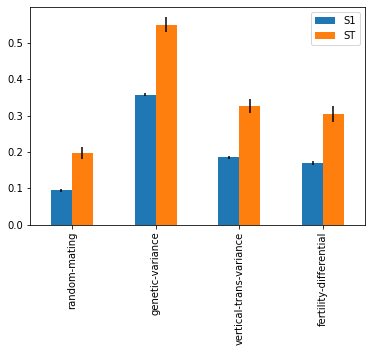

In [6]:
ef = Sensitivity(problem, df['g4'], X)
ef.score('efast')
ef.plot(save=True, filepath= plots_path + 'snp-vt-efast-prop-obese-test.pdf',
    move=True, moving_path= '../manuscript/plots/')
ef.plot3D(labels={'outcome':'obese', 'y':'random mating', 'x':'vertical transmission', 'z':'genes'})

sav = {
    'ef_obese_s1': ef.tabval('S1'),
    'ef_obese_st': ef.tabval('ST')
}

## Average BMI

                               S1        ST   S1_conf   ST_conf
random-mating            0.089777  0.177092  0.004331  0.019036
genetic-variance         0.372151  0.535488  0.003464  0.018726
vertical-trans-variance  0.155027  0.265179  0.004016  0.018891
fertility-differential   0.213210  0.338310  0.004077  0.019064


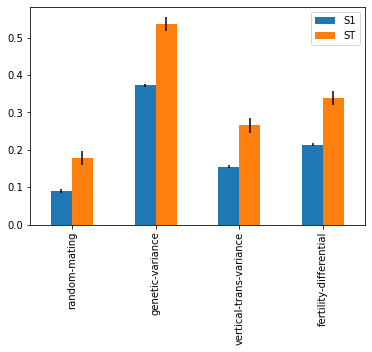

In [7]:
ef = Sensitivity(problem, df['average_bmi'], X)
ef.score('efast')
ef.plot(save=True, filepath= plots_path + 'snp-vt-efast-average-bmi-test.pdf',
    move=True, moving_path= '../manuscript/plots/')
ef.plot3D(labels={'outcome':'average bmi', 'y':'random mating', 'x':'vertical transmission', 'z':'genes'})

sav['ef_average_s1'] = ef.tabval('S1')
sav['ef_average_st'] = ef.tabval('ST')

## SD BMI

                               S1        ST   S1_conf   ST_conf
random-mating            0.136121  0.243020  0.004086  0.015615
genetic-variance         0.257616  0.417314  0.003688  0.020242
vertical-trans-variance  0.301362  0.474675  0.003218  0.018218
fertility-differential   0.016931  0.081364  0.003736  0.018376


['efast-snp-vt.pkl']

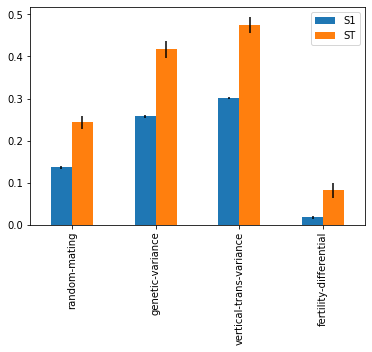

In [8]:
ef = Sensitivity(problem, df['sd_bmi'], X)
ef.score('efast')
ef.plot(save=True, filepath= plots_path + 'snp-vt-efast-sd-bmi-test.pdf',
    move=True, moving_path= '../manuscript/plots/')
ef.plot3D(labels={'outcome':'sd bmi', 'y':'random mating', 'x':'vertical transmission', 'z':'genes'})

sav['ef_sd_s1'] = ef.tabval('S1')
sav['ef_sd_st'] = ef.tabval('ST')

# save output
v = ef.createRows(sav)
joblib.dump(v, 'efast-snp-vt.pkl')